In [1]:
%matplotlib inline
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objs as go
from bs4 import BeautifulSoup
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
py.init_notebook_mode(connected=True)

In [3]:
train=pd.read_csv("C:\\Users\\gunnu\\Downloads\\mbti_1.csv")
us=pd.read_csv("C:\\Users\\gunnu\\Downloads\\Users.csv")
ps=pd.read_csv("C:\\Users\\gunnu\\Downloads\\ForumMessages.csv")
mbti={'I':'Introversion', 'E':'Extroversion','N':'Intutions','S':'Sensing','T':'Thinking','F':'Feeling','J':'Judging','P':'Perceiving'}


In [4]:
train.shape

(8675, 2)

C:\Users\gunnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



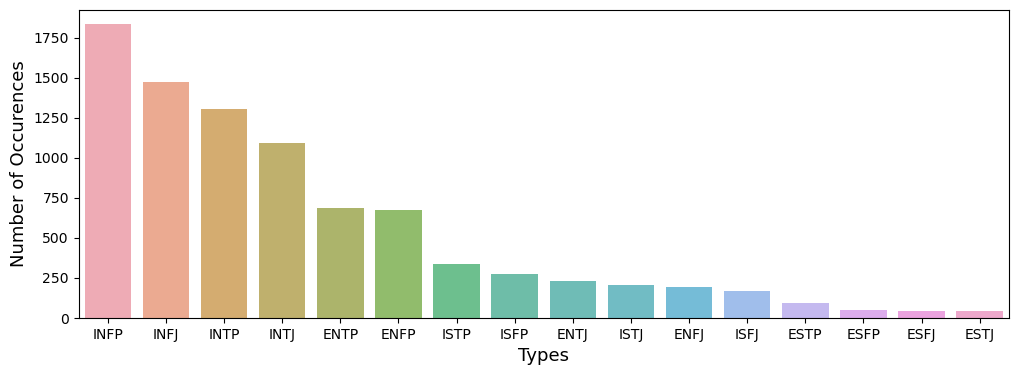

In [5]:
cnt_srs=train['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel("Number of Occurences",fontsize=13)
plt.xlabel("Types",fontsize=13)
plt.show()

In [6]:
ps['Message']=ps['Message'].fillna('')

In [7]:
ps_join=ps.groupby('PostUserId')['Message'].agg(lambda col: ' '.join(col)).reset_index()

In [8]:
etc=ExtraTreesClassifier(n_estimators=20,max_depth=4,n_jobs=-1)
tfidf=TfidfVectorizer(ngram_range=(1,1),stop_words="english")
tsvd=TruncatedSVD(n_components=10)
model=Pipeline([('tfidf',tfidf),('tsvdi',tsvd),('etc',etc)])

In [9]:
kfolds=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)


In [10]:
np.random.seed(1)
scoring={'acc':'accuracy',
        'neg_log_loss':'neg_log_loss',
        'f1_micro':'f1_micro'}
results=cross_validate(model,train['posts'],train['type'],cv=kfolds,scoring=scoring,n_jobs=-1)

In [11]:
#AS THE DATASET IS VERY UNALANCED, F1 SCORE IS A BETTER METRIC.
print("CV accuracy: {:0.4f}(+/- {:0.4f})".format(np.mean(results['test_acc']),np.std(results['test_acc'])))
print("CV F1: {:0.4f}(+/- {:0.4f})".format(np.mean(results['test_f1_micro']),np.std(results['test_f1_micro'])))
print("CV Logloss: {:0.4f}(+/- {:0.4f})".format(np.mean(results['test_neg_log_loss']),np.std(results['test_neg_log_loss'])))

CV accuracy: 0.2969(+/- 0.0157)
CV F1: 0.2969(+/- 0.0157)
CV Logloss: -2.1485(+/- 0.0135)


In [12]:
def cleanText(text):
    text=BeautifulSoup(text,'lxml').text
    text=re.sub(r'\|\|\|',r'',text)
    text=re.sub(r'http\S+',r'<URL>',text)
    return text


In [13]:
train['clean_posts']=train['posts'].apply(cleanText)


C:\Users\gunnu\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [14]:
np.random.seed(1)
scoring={'acc':'accuracy',
        'neg_log_loss':'neg_log_loss',
        'f1_micro':'f1_micro'}
results=cross_validate(model,train['posts'],train['type'],cv=kfolds,scoring=scoring,n_jobs=-1)

In [15]:
#AS THE DATASET IS VERY UNALANCED, F1 SCORE IS A BETTER METRIC.
print("CV accuracy: {:0.4f}(+/- {:0.4f})".format(np.mean(results['test_acc']),np.std(results['test_acc'])))
print("CV F1: {:0.4f}(+/- {:0.4f})".format(np.mean(results['test_f1_micro']),np.std(results['test_f1_micro'])))
print("CV Logloss: {:0.4f}(+/- {:0.4f})".format(np.mean(results['test_neg_log_loss']),np.std(results['test_neg_log_loss'])))

CV accuracy: 0.2953(+/- 0.0190)
CV F1: 0.2953(+/- 0.0190)
CV Logloss: -2.1478(+/- 0.0161)


In [16]:
model_lr = LogisticRegression()
train_sizes,train_scores,test_scores=\
learning_curve(model_lr,train['clean_posts'],train['type'],cv=kfolds,n_jobs=-1,
              scoring="f1_micro",train_sizes=np.linspace(.1,1.0,10),random_state=1)



In [17]:
def plot_learning_curve(X,y,train_sizes,train_scores,test_scores,title='',ylim=None,figsize=(14,8)):
    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean,'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    
    return plt

In [19]:
# Assuming the required data and scores have been computed earlier in your code
# For example, after running the learning_curve function:
train_sizes, train_scores, test_scores = learning_curve(model_lr, X, y, cv=kfolds, n_jobs=-1,
                                                        scoring="f1_micro", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)

# Call the plot_learning_curve function and pass the required arguments
plot_learning_curve(X, y, train_sizes, train_scores, test_scores, ylim=(0.1, 1.01), figsize=(13, 6))

# Show the plot
plt.show()


NameError: name 'X' is not defined

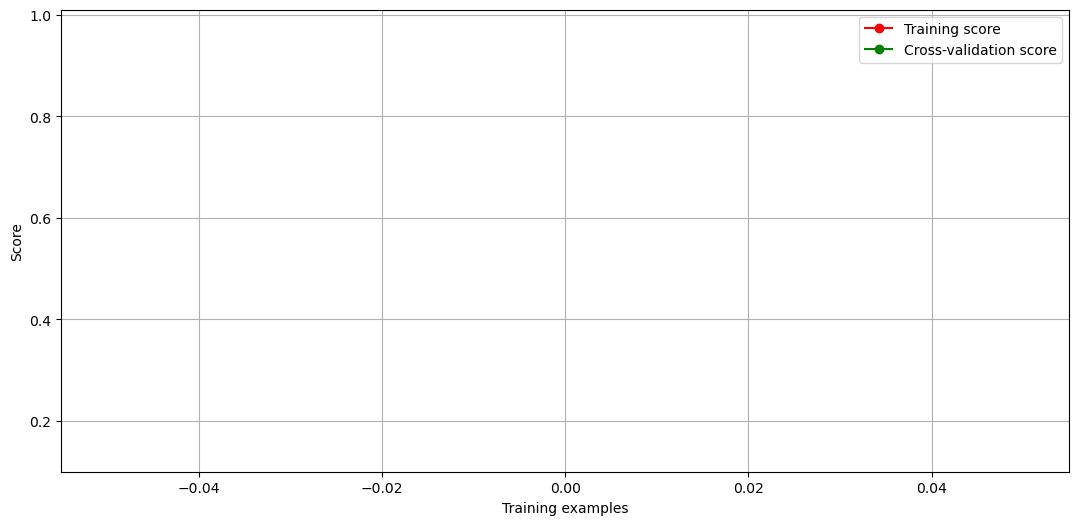

In [18]:
plot_learning_curve(train['posts'],train['type'],train_sizes,
                   train_scores,test_scores,ylim=(0.1,1.01),figsize=(13,6))
plt.show()